In [1]:
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height = 9)
# 맥에서는 실행해야 한글이 보임
Sys.setlocale(category = 'LC_ALL',locale = 'ko_KR.UTF-8')

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

# Baby Names

In [7]:
baby <- read.csv("../Data/R_Baby_Names_1880-2014.csv")
head(baby)

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<chr>,<int>
1,Mary,F,7065,01/01/1880 12:00:00 AM,1
2,Anna,F,2604,01/01/1880 12:00:00 AM,2
3,Emma,F,2003,01/01/1880 12:00:00 AM,3
4,Elizabeth,F,1939,01/01/1880 12:00:00 AM,4
5,Minnie,F,1746,01/01/1880 12:00:00 AM,5
6,Margaret,F,1578,01/01/1880 12:00:00 AM,6


In [3]:
tail(baby)

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<chr>,<int>
1825383,Zyel,M,5,01/01/2014 12:00:00 AM,13972
1825384,Zykeem,M,5,01/01/2014 12:00:00 AM,13973
1825385,Zymeer,M,5,01/01/2014 12:00:00 AM,13974
1825386,Zymiere,M,5,01/01/2014 12:00:00 AM,13975
1825387,Zyran,M,5,01/01/2014 12:00:00 AM,13976
1825388,Zyrin,M,5,01/01/2014 12:00:00 AM,13977


In [4]:
str(baby)

'data.frame':	1825388 obs. of  5 variables:
 $ Name     : chr  "Mary" "Anna" "Emma" "Elizabeth" ...
 $ Gender   : chr  "F" "F" "F" "F" ...
 $ Count    : int  7065 2604 2003 1939 1746 1578 1472 1414 1320 1288 ...
 $ Year     : chr  "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" "01/01/1880 12:00:00 AM" ...
 $ Year.Rank: int  1 2 3 4 5 6 7 8 9 10 ...


In [8]:
# baby의 Year부분 정리하기
baby$Year <- as.numeric(substr(baby$Year, 7, 10))
head(baby)

,Name,Gender,Count,Year,Year.Rank
,<chr>,<chr>,<int>,<dbl>,<int>
1,Mary,F,7065,1880,1
2,Anna,F,2604,1880,2
3,Emma,F,2003,1880,3
4,Elizabeth,F,1939,1880,4
5,Minnie,F,1746,1880,5
6,Margaret,F,1578,1880,6


In [10]:
write.csv(baby, "../Data/baby.csv", row.names = F)

In [13]:
# baby에서 여자아이만 female이라는 데이터셋을 만들고 row수 구하기
female <- subset(baby, Gender == "F")
nrow(female)

[1] 1081660

In [16]:
# baby에서 남자아이만 male이라는 데이터셋을 만들고 row수 구하기
male <- subset(baby, Gender == "M")
nrow(male)

[1] 743728

In [15]:
# 여자 아이 이름수 계산하기
length(unique(female$Name))

[1] 64911

In [17]:
# 남자 아이 이름수 계산하기
length(unique(male$Name))

[1] 39199

In [24]:
# 적용
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [26]:
# 가장 많이 사용된 여자아이 이름 Top 10 구하기
head(arrange(aggregate(Count ~ Name, female, sum), desc(Count)),10)

,Name,Count
,<chr>,<int>
1,Mary,4115282
2,Elizabeth,1601128
3,Patricia,1570567
4,Jennifer,1462742
5,Linda,1450843
6,Barbara,1432944
7,Margaret,1240006
8,Susan,1120469
9,Dorothy,1105680


In [34]:
# 1880~2014년 인구분포 현황 (남, 여)
# x 축 = 년도
# y 축 = 인구수
# 남자 그룹 ,여자그룹, male, female
year_by_male <- aggregate(Count ~ Year, male, sum)
year_by_female <- aggregate(Count ~ Year, female, sum)
years <- unique(baby$Year)
years


[1] 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894
 [16] 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909
 [31] 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924
 [46] 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939
 [61] 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 [76] 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 [91] 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
[106] 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
[121] 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014

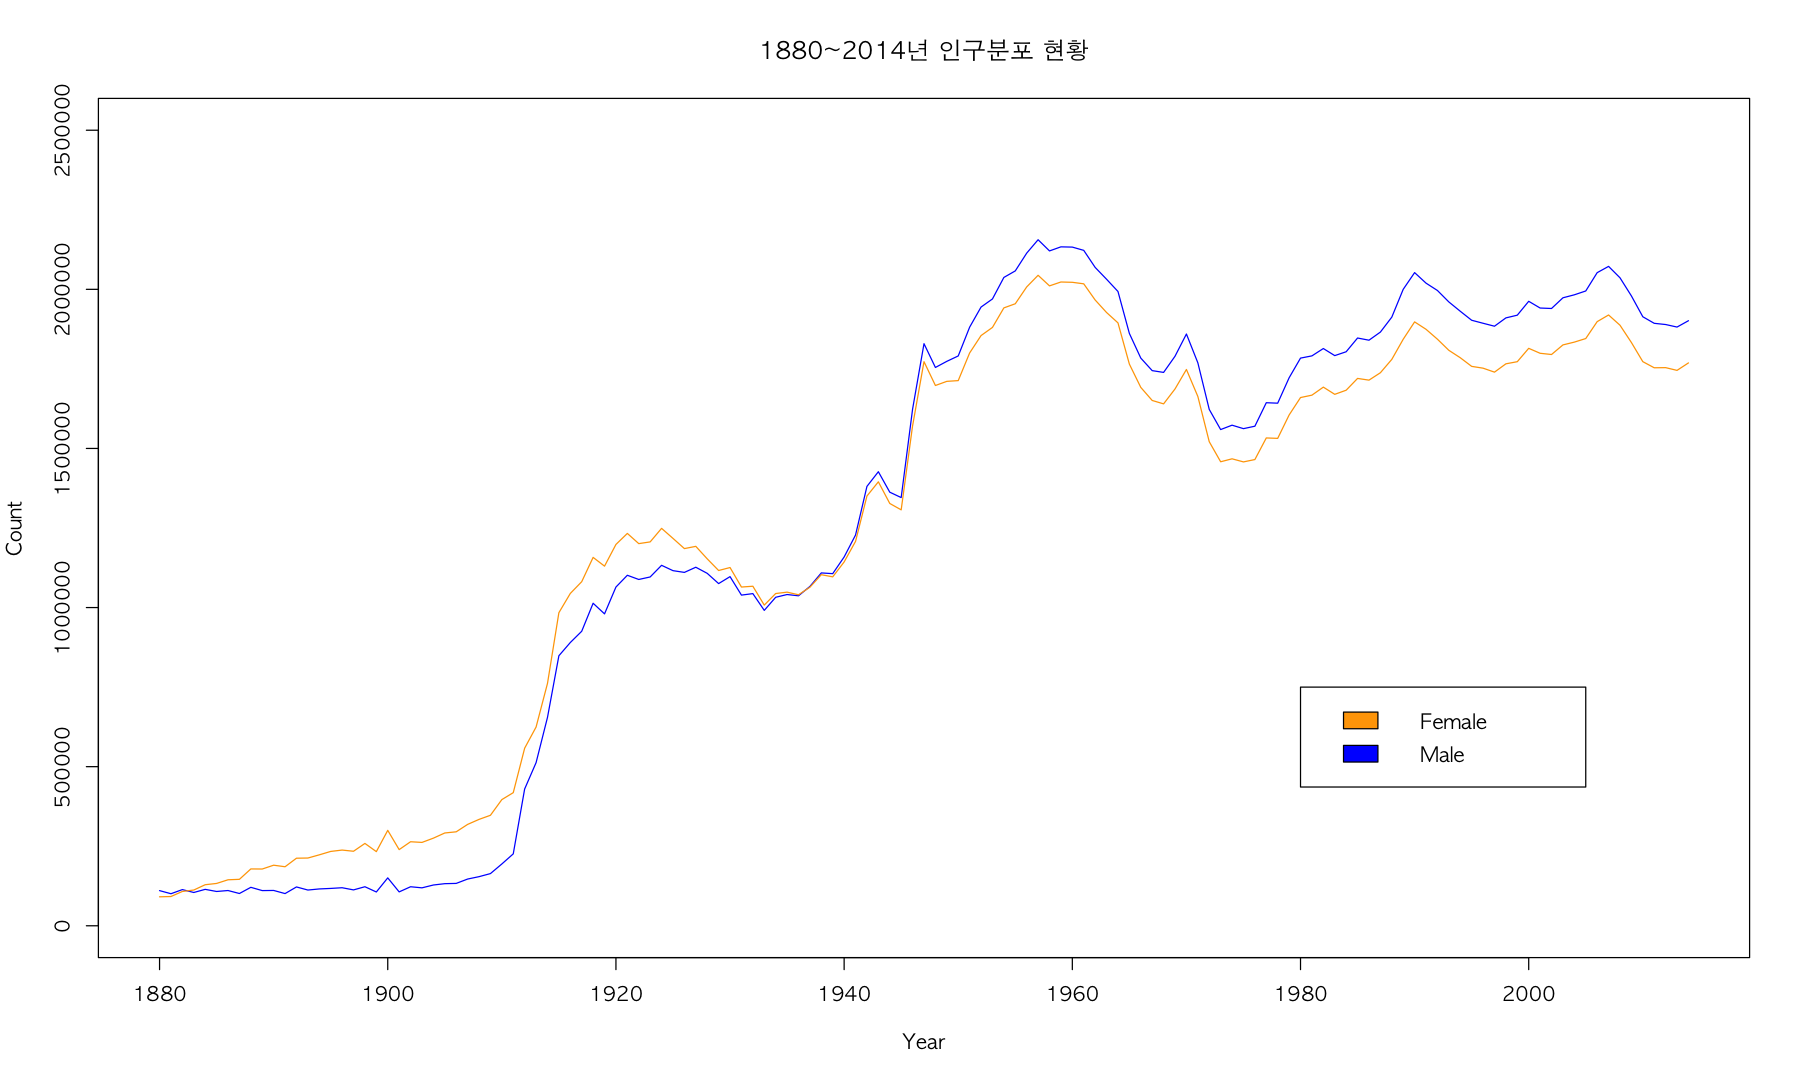

In [56]:
par(bg = "white", family = "AppleGothic")
plot(
    years,
    year_by_male$Count,
    type = "l",
    col = "blue",
    ylim = c(0, 2500000),
    xlab = "Year",
    ylab = "Count",
    main = "1880~2014년 인구분포 현황"
)

lines(
    years,
    year_by_female$Count,
    type="l",
    col = "orange"
)

legend(
    1980,
    750000,
    c("Female", "Male"),
    fill = c("orange", "blue"),

)
